### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 유능한 쇼핑몰 데이터분석가이다. 
당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 각 컬럼은 [데이터 설명]과 같다.
주어진 데이터에 따라서 내 질문에 답해.

- **[데이터 설명]**:
    - **OrderID**: 주문 ID (index설정)
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

[조건]
1. 코드를 제공할때 이해하기 쉽게 주석을 제공할것.
2. 한번에 복사 및 붙여넣기 하기 쉽게 마지막에 정리를 추가할것.
3. 코드는 한줄에 전부 쓰지말고, 초보자도 이해하기 쉽게 가독성 좋게 작성할 것.
4. 시각화를 요청한다면, 라벨이나 설명을 한글로 작성 할 것.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.

In [8]:
import pandas as pd

# 1. 데이터셋 파일을 읽어옵니다. OrderID를 인덱스로 설정합니다.
df = pd.read_csv('data/ecommerce_sales_data.csv', index_col='OrderID')

# 2. 상위 5개 행을 출력합니다.
df.head(5)


,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
OrderID,,,,,,,,,
1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09


2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.

In [10]:
# 각 열별 결측값의 개수 출력
df.isnull().sum() # discountRate에 결측값 있음

Product         0
Category        0
Quantity        0
Price           0
CustomerID      0
Birthdate       0
OrderDate       0
Country         0
DiscountRate    0
dtype: int64

In [9]:

# 평균값으로 결측값을 채움
df['DiscountRate'] = df['DiscountRate'].fillna(df['DiscountRate'].mean())

3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [11]:
df.dtypes

Product          object
Category         object
Quantity          int64
Price             int64
CustomerID        int64
Birthdate        object
OrderDate        object
Country          object
DiscountRate    float64
dtype: object

In [13]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

df.dtypes

Product                 object
Category                object
Quantity                 int64
Price                    int64
CustomerID               int64
Birthdate               object
OrderDate       datetime64[ns]
Country                 object
DiscountRate           float64
dtype: object

2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`

In [ ]:
df['TotalRevenue'] = df['Quantity'] * df['Price'] # 매출액 계산 및 컬럼추가

df['TotalRevenue'].head

<bound method NDFrame.head of OrderID
1      185000
2      100000
3       32000
4        8000
5       78000
        ...  
116     33000
117    164000
118     33000
119     86000
120     48000
Name: TotalRevenue, Length: 120, dtype: int64>

    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.

In [18]:
df = df.set_index('OrderDate')
monthly_revenue = df['TotalRevenue'].resample('M').sum()

monthly_revenue

C:\Users\WIA\AppData\Local\Temp\ipykernel_18956\2257434326.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df['TotalRevenue'].resample('M').sum()


OrderDate
2023-10-31     392000
2023-11-30     995000
2023-12-31     920000
2024-01-31     905000
2024-02-29     565000
2024-03-31     703000
2024-04-30     288000
2024-05-31     930000
2024-06-30    1365000
2024-07-31     712000
2024-08-31     635000
2024-09-30     319000
2024-10-31     190000
Freq: ME, Name: TotalRevenue, dtype: int64

In [21]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'    # Windows 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False       # 마이너스 기호 깨짐 방지


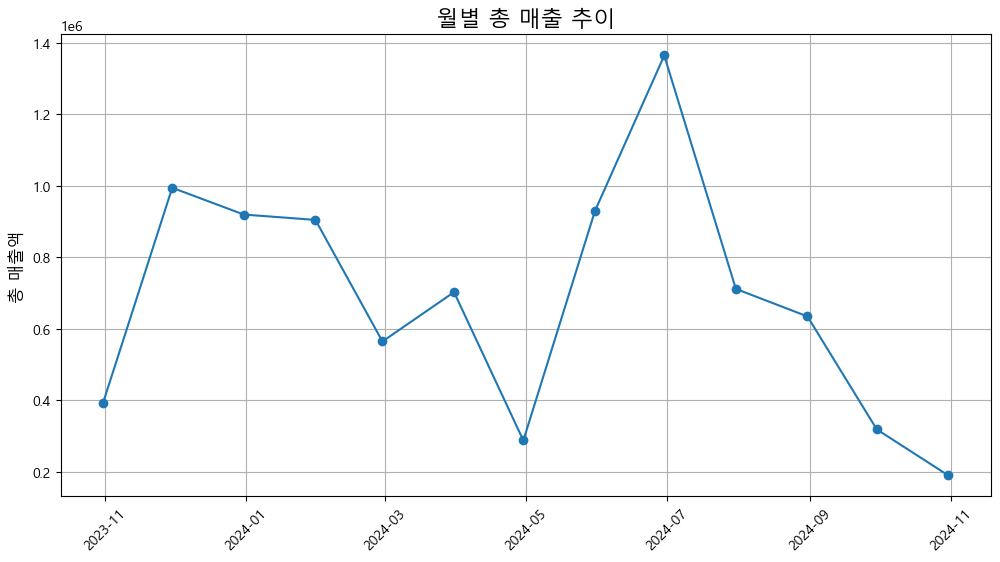

In [ ]:
# 월별 매출 집계 (monthly_revenue)는 이미 위에서 구한 Series
plt.figure(figsize=(12, 6))                    # 크기 지정(원하는대로 바꿀 수 있음)
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.title('월별 총 매출 추이', fontsize=16)
plt.ylabel('총 매출액', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)                        # x축 라벨이 기울어져 잘 보임
plt.show()

    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.

In [ ]:
# 카테고리별 총 매출액 계산
category_revenue = df.groupby('Category')['TotalRevenue'].sum()

# 매출액 기준으로 내림차순 정렬 후 상위 3개 추출
top3_categories = category_revenue.sort_values(ascending=False).head(3)

print(top3_categories)

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64


4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [27]:
# 국가별 총 매출액 계산
country_revenue = df.groupby('Country')['TotalRevenue'].sum()

# 매출액 기준으로 내림차순 정렬 후 상위 5개 추출
top5_countries = country_revenue.sort_values(ascending=False)

top5_countries

Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.